title: "CIND820_Capstone_EDA_Data_Cleaning"

output: html_document

original date: "2025-06-21"

update date: "2025-07-27"

---
Name: Elizabeth Esnard 

Course Section: CIND 820 

TMU Student Number: 501342464 

In [1]:
#import relevant libraries

import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

Importing the dataset

In [2]:
#set working directory to the relevant folder holding the dataset
os.chdir(r"C:\Users\lizes\Documents\TMU - Chang School\CIND820\dataset bnpl")

In [3]:
#create a variable to hold the raw dataset
loan_working_copy = pd.read_csv("loan_working_copy.csv")

#check the shape of the dataset
loan_working_copy.shape

(1048575, 29)

In [4]:
#prior to filtering, let's observice the summary statistics of the raw dataset
loan_working_copy.describe().round(2)

,loan_amnt,int_rate,monthly_payment,annual_inc,total_dti,delinq_2yrs,open_acc,cur_acct_delinq,tot_coll_amt,tot_cur_bal,mort_acc,num_accts_120_pd,pub_rec_bankruptcies,tax_liens,credit_limit,total_bal_ex_mort
count,1048575.00,1048575.00,1048575.00,1048575.00,1047378.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00,1048575.00
mean,15384.87,12.80,453.82,79674.61,19.29,0.30,11.71,0.00,242.99,143579.40,1.46,0.51,0.13,0.04,181512.39,52306.63
std,9533.84,4.96,276.21,84101.83,15.90,0.86,5.85,0.06,8183.68,163871.02,1.80,1.38,0.37,0.37,185585.00,51568.33
min,1000.00,5.31,14.77,0.00,-1.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,8000.00,9.16,251.65,47000.00,11.93,0.00,8.00,0.00,0.00,28834.00,0.00,0.00,0.00,0.00,51895.00,20912.00
50%,13000.00,11.99,380.66,66000.00,18.05,0.00,11.00,0.00,0.00,78318.00,1.00,0.00,0.00,0.00,115606.00,38594.00
75%,20000.00,15.49,609.44,95000.00,25.02,0.00,15.00,0.00,0.00,214929.50,2.00,0.00,0.00,0.00,262282.50,66337.00
max,40000.00,30.99,1670.15,9930475.00,999.00,58.00,101.00,6.00,6214661.00,9971659.00,87.00,58.00,9.00,85.00,9999999.00,2622906.00


Buy Now, Pay Later purchases are being used for smaller purchases, so this paper will go on to 
filter the observations based on certain attributes into a working dataset which will be exported at the end of this notebook. 

In [5]:
#create variable to hold EDA dataset
BNPL_clients = pd.read_csv("loan_working_copy.csv")

#filter dataset to simulate BNPL purchase amounts
BNPL_clients = BNPL_clients[BNPL_clients['loan_amnt'] <= 3500]

#check number of rows after filter
print('Number of observations post loan_amount filtering:', len(BNPL_clients))

Number of observations post loan_amount filtering: 59092


In [6]:
#check variable names
BNPL_clients.columns

Index(['loan_amnt', 'loan_term', 'int_rate', 'monthly_payment', 'sub_grade',
       'emp_title', 'emp_length', 'home_ownership', 'annual_inc',
       'verification_status', 'loan_purpose', 'addr_state', 'total_dti',
       'delinq_2yrs', 'open_acc', 'application_type', 'cur_acct_delinq',
       'tot_coll_amt', 'tot_cur_bal', 'mort_acc', 'num_accts_120_pd',
       'pub_rec_bankruptcies', 'tax_liens', 'credit_limit',
       'total_bal_ex_mort', 'hardship_flag', 'disbursement_method',
       'debt_settlement_flag', 'loan_status'],
      dtype='object')

In [7]:
#summary statistics of variables, post filtering
BNPL_clients.describe().round(2)

,loan_amnt,int_rate,monthly_payment,annual_inc,total_dti,delinq_2yrs,open_acc,cur_acct_delinq,tot_coll_amt,tot_cur_bal,mort_acc,num_accts_120_pd,pub_rec_bankruptcies,tax_liens,credit_limit,total_bal_ex_mort
count,59092.00,59092.00,59092.00,59092.00,59053.00,59092.00,59092.00,59092.00,59092.00,59092.00,59092.00,59092.00,59092.00,59092.00,59092.00,59092.00
mean,2416.88,13.20,81.55,54438.96,18.15,0.31,9.90,0.00,257.19,90534.45,1.01,0.57,0.14,0.03,115381.94,36225.32
std,759.87,4.79,25.78,67295.12,13.91,0.90,5.35,0.06,1880.44,111906.41,1.49,1.52,0.37,0.27,130769.65,39430.77
min,1000.00,5.31,29.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2000.00,9.76,63.18,32756.00,10.69,0.00,6.00,0.00,0.00,15496.75,0.00,0.00,0.00,0.00,30450.00,11827.75
50%,2500.00,12.69,85.44,48000.00,17.17,0.00,9.00,0.00,0.00,40149.50,0.00,0.00,0.00,0.00,62967.00,25585.50
75%,3000.00,15.99,101.80,67000.00,24.40,0.00,13.00,0.00,0.00,135296.00,2.00,0.00,0.00,0.00,167608.25,46800.75
max,3500.00,30.99,149.53,7000000.00,999.00,20.00,57.00,4.00,208593.00,1389307.00,17.00,36.00,6.00,9.00,9999999.00,878659.00


We've filtered the dataset to be within a loan_amount range within BNPL purchases. 
Based off the summary statistics above, however, there are some noticable outliers like the max income of 7,000,000.

<Axes: xlabel='annual_inc'>

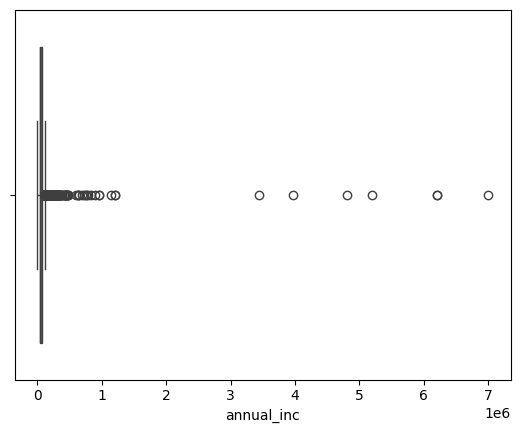

In [8]:
#plot annual_inc in a boxplot to observe outliers
sns.boxplot(x=BNPL_clients['annual_inc'])

In [9]:
#calculate the quartiles for annual_inc to identify outliers over Q3

Q3 = BNPL_clients['annual_inc'].quantile(0.75)
print('Q3:', Q3)

Q3: 67000.0


<Axes: xlabel='annual_inc'>

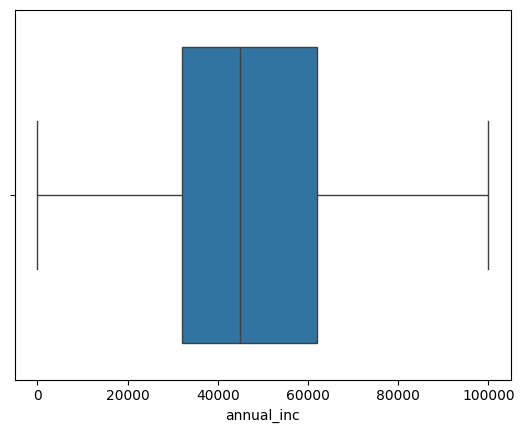

In [10]:
#filter dataset to remove outliers in annual_inc
BNPL_clients = BNPL_clients[BNPL_clients['annual_inc'] <= 100000]

#confirm with another boxplot
sns.boxplot(x=BNPL_clients['annual_inc'])

In [11]:
BNPL_clients.shape

(55168, 29)

In [12]:
#review the summary statistics again to see if removing annual income outliers also removed other outliers in other attributes
BNPL_clients.describe().round(2)

,loan_amnt,int_rate,monthly_payment,annual_inc,total_dti,delinq_2yrs,open_acc,cur_acct_delinq,tot_coll_amt,tot_cur_bal,mort_acc,num_accts_120_pd,pub_rec_bankruptcies,tax_liens,credit_limit,total_bal_ex_mort
count,55168.00,55168.00,55168.00,55168.00,55129.00,55168.00,55168.00,55168.00,55168.00,55168.00,55168.00,55168.00,55168.00,55168.00,55168.00,55168.00
mean,2409.73,13.24,81.34,47958.74,18.40,0.29,9.70,0.00,254.70,80361.21,0.93,0.56,0.14,0.03,103398.31,33670.97
std,762.19,4.80,25.87,21300.29,14.21,0.88,5.24,0.06,1798.34,96913.10,1.42,1.50,0.38,0.27,107361.68,36434.16
min,1000.00,5.31,29.76,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00,0.00
25%,2000.00,9.89,62.85,32000.00,10.88,0.00,6.00,0.00,0.00,14521.75,0.00,0.00,0.00,0.00,29000.00,11174.50
50%,2500.00,12.73,84.95,45000.00,17.48,0.00,9.00,0.00,0.00,36709.50,0.00,0.00,0.00,0.00,58409.00,24198.50
75%,3000.00,16.01,101.67,62000.00,24.71,0.00,12.00,0.00,0.00,120654.50,2.00,0.00,0.00,0.00,151200.00,43735.25
max,3500.00,30.99,149.53,100000.00,999.00,20.00,54.00,4.00,208593.00,1147362.00,17.00,36.00,6.00,9.00,1163315.00,878659.00


Reviewing the summary statistics again, some values may seem extreme, like a credit limit of 978,976.
However, considering the data from Kaggle does not have meta data, we cannot know the range or context of the attributes. 

Consider how credit limit could be in reference to a credit card's limit, but it can also be in reference to a person's overall credit limit - like when applying for a mortage. 

<Axes: xlabel='annual_inc', ylabel='credit_limit'>

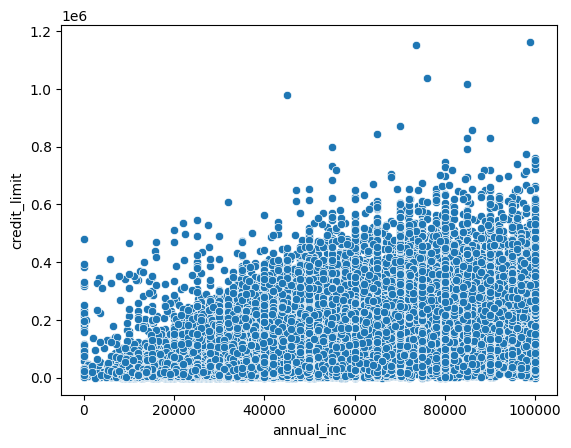

In [13]:
#reviewing annual income against credit limit, the values are increasing proportionally.
sns.scatterplot(x=BNPL_clients['annual_inc'], y=BNPL_clients['credit_limit'])

Based off the summary statistics after removing annual income outliers, no further outliers will be removed. 
The dataset appears realistic and proportional. 

In [14]:
#review the data types of the attributes
BNPL_clients.dtypes

loan_amnt                 int64
loan_term                object
int_rate                float64
monthly_payment         float64
sub_grade                object
emp_title                object
emp_length               object
home_ownership           object
annual_inc              float64
verification_status      object
loan_purpose             object
addr_state               object
total_dti               float64
delinq_2yrs               int64
open_acc                  int64
application_type         object
cur_acct_delinq           int64
tot_coll_amt              int64
tot_cur_bal               int64
mort_acc                  int64
num_accts_120_pd          int64
pub_rec_bankruptcies      int64
tax_liens                 int64
credit_limit              int64
total_bal_ex_mort         int64
hardship_flag            object
disbursement_method      object
debt_settlement_flag     object
loan_status              object
dtype: object

In [14]:
#filter numerical, non-categorical and non-logical variable into a list and review summary statistics
BNPL_numerical = BNPL_clients[['loan_amnt', 'int_rate', 'monthly_payment', 'annual_inc', 'total_dti', 'tot_coll_amt', 'tot_cur_bal', 'credit_limit']]

BNPL_numerical.describe().round(2)

,loan_amnt,int_rate,monthly_payment,annual_inc,total_dti,tot_coll_amt,tot_cur_bal,credit_limit
count,55168.00,55168.00,55168.00,55168.00,55129.00,55168.00,55168.00,55168.00
mean,2409.73,13.24,81.34,47958.74,18.40,254.70,80361.21,103398.31
std,762.19,4.80,25.87,21300.29,14.21,1798.34,96913.10,107361.68
min,1000.00,5.31,29.76,0.00,0.00,0.00,0.00,0.00
25%,2000.00,9.89,62.85,32000.00,10.88,0.00,14521.75,29000.00
50%,2500.00,12.73,84.95,45000.00,17.48,0.00,36709.50,58409.00
75%,3000.00,16.01,101.67,62000.00,24.71,0.00,120654.50,151200.00
max,3500.00,30.99,149.53,100000.00,999.00,208593.00,1147362.00,1163315.00


In [15]:
#the dataset's target variable is loan_status, currently containing multiple categories
BNPL_clients['loan_status'].unique()

array(['Current', 'Fully Paid', 'In Grace Period', 'Late (31-120 days)',
       'Late (16-30 days)', 'Charged Off', 'Default'], dtype=object)

Text(0.5, 0.98, 'Distribution of Target Variable')

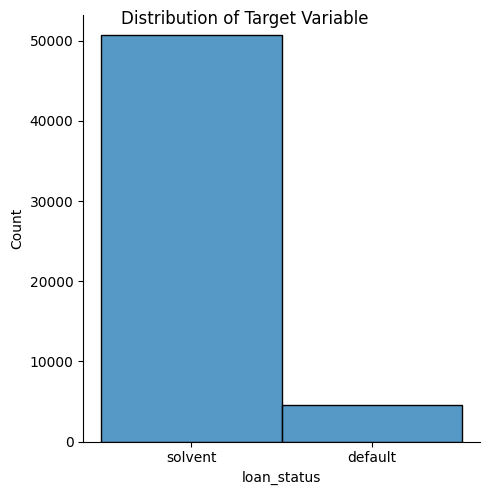

In [17]:
#change all the categories into the two desired targets for binary classification; solvent and default

BNPL_clients['loan_status'].replace(to_replace=('Current','Fully Paid','In Grace Period'), value='solvent', inplace=True)
BNPL_clients['loan_status'].replace(to_replace=('Late (31-120 days)', 'Late (16-30 days)', 'Charged Off', 'Default'), value="default", inplace=True)

#generate a plot to confirm the distribution of the renamed target variable categories

target_plot = sns.displot(BNPL_clients, x='loan_status')
target_plot.fig.suptitle("Distribution of Target Variable")

Outliers removed and target variable simplified into binary classification labels, we'll now filter for missing values. 

In [23]:
#identify any missing values
BNPL_clients.isna().sum()

loan_amnt                0
loan_term                0
int_rate                 0
monthly_payment          0
sub_grade                0
emp_length               0
home_ownership           0
annual_inc               0
verification_status      0
loan_purpose             0
addr_state               0
total_dti               39
delinq_2yrs              0
open_acc                 0
application_type         0
cur_acct_delinq          0
tot_coll_amt             0
tot_cur_bal              0
mort_acc                 0
num_accts_120_pd         0
pub_rec_bankruptcies     0
tax_liens                0
credit_limit             0
total_bal_ex_mort        0
hardship_flag            0
disbursement_method      0
debt_settlement_flag     0
loan_status              0
dtype: int64

Manually reviewing the dataset showed emp_length can be easily aggrevated into categories. 

In [24]:
#identify the categories of emp_length
BNPL_clients['emp_length'].unique()

['10+ years', '4 years', '3 years', '5 years', '1 year', ..., '2 years', '< 1 year', '6 years', '8 years', '9 years']
Length: 11
Categories (11, object): ['< 1 year' < '1 year' < '2 years' < '3 years' ... '7 years' < '8 years' < '9 years' < '10+ years']

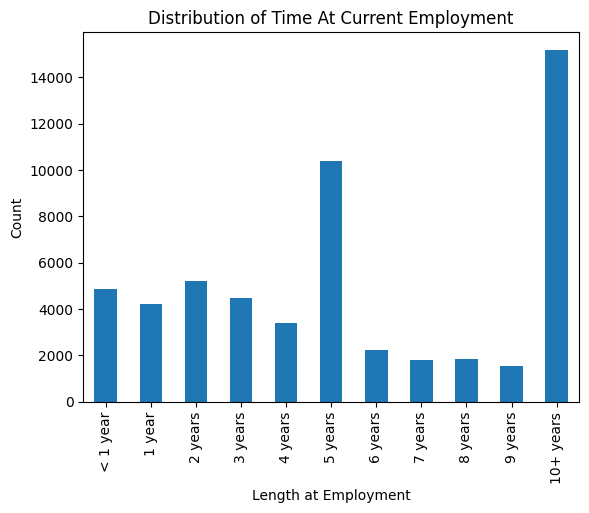

In [25]:
#check the distribution of the emp_length variable 

#first set the order of emp_length
length_order = ['< 1 year','1 year', '2 years', '3 years', '4 years',  '5 years', '6 years',  '7 years', '8 years', '9 years', '10+ years']

#apply the order via pd.Categorical
BNPL_clients['emp_length'] = pd.Categorical(BNPL_clients['emp_length'], categories=length_order, ordered=True)
length_counts = BNPL_clients['emp_length'].value_counts().reindex(BNPL_clients['emp_length'].cat.categories)

#plot the distribution of emp_length
length_counts.plot(kind='bar')
plt.xlabel("Length at Employment")
plt.ylabel("Count")
plt.title("Distribution of Time At Current Employment")
plt.show()

Replacing the missing values of emp_length with the mean value ('10+ years') could unintentionaly influence the models.
Instead, the mode of the attribute ('5 years') will be used as a replacement.

0


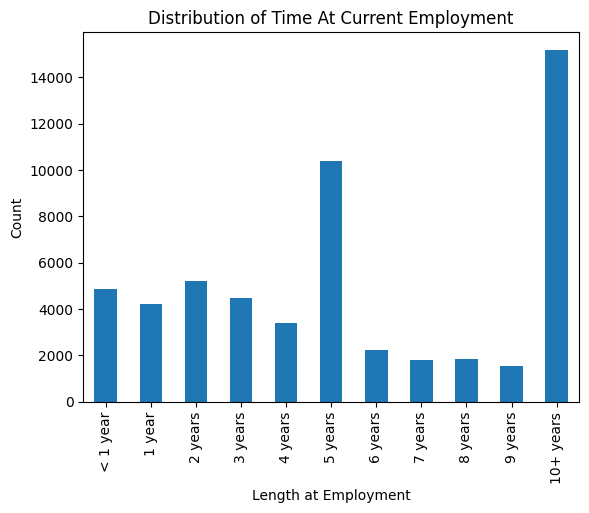

In [26]:
#Replace the NA values with mode
BNPL_clients['emp_length'] = BNPL_clients['emp_length'].fillna('5 years')

#confirm the fillna() function was successful
print(BNPL_clients['emp_length'].isna().sum())

length_counts.plot(kind='bar')
plt.xlabel("Length at Employment")
plt.ylabel("Count")
plt.title("Distribution of Time At Current Employment")
plt.show()

Moving onto the attribute emp_title, observing the raw dataset confirms aggregation of the values would be impossible. 
Likely this attribute allowed free entry as an answer, so job titles have incorrect grammar (no capital letters), incorrect spelling,
or are just acronyms. 

Instead of replacing the missing values, the entire column will be dropped. 

In [27]:
#drop emp_title column
BNPL_clients = BNPL_clients.drop(columns='emp_title', axis=1)

#confirm by checking the shape of the dataset
BNPL_clients.shape

KeyError: "['emp_title'] not found in axis"

Moving onto total_dti, manually observing these observations reveals all are within the 'solvent' category. 
Dropping observations from the majority classification will not affect model performance.

In [28]:
#drop the total_dti NA rows
BNPL_clients = pd.DataFrame.dropna(BNPL_clients, axis=0, subset='total_dti')

#confirm no more NA values across all attributes
BNPL_clients.isna().sum()

loan_amnt               0
loan_term               0
int_rate                0
monthly_payment         0
sub_grade               0
emp_length              0
home_ownership          0
annual_inc              0
verification_status     0
loan_purpose            0
addr_state              0
total_dti               0
delinq_2yrs             0
open_acc                0
application_type        0
cur_acct_delinq         0
tot_coll_amt            0
tot_cur_bal             0
mort_acc                0
num_accts_120_pd        0
pub_rec_bankruptcies    0
tax_liens               0
credit_limit            0
total_bal_ex_mort       0
hardship_flag           0
disbursement_method     0
debt_settlement_flag    0
loan_status             0
dtype: int64

In [29]:
BNPL_clients.shape

(55129, 28)

In [30]:
#the data cleaning is now complete. Export the file for convenience. 

BNPL_clients.to_excel('clean_BNPL_python.xlsx')

BNPL_clients.to_csv('clean_BNPL_python.csv')